In [104]:
from pathlib import Path
from glob import glob
import pandas as pd
import numpy as np

from alternationprober.constants import (
    PATH_TO_BERT_WORD_EMBEDDINGS_FILE,
    PATH_TO_BERT_CONTEXT_WORD_EMBEDDINGS_FILE,
    PATH_TO_LAVA_DIR,
    PATH_TO_LAVA_VOCAB,
    PATH_TO_RESULTS_DIRECTORY,
)

import matplotlib.pyplot as plt

In [71]:
experiment_results = PATH_TO_RESULTS_DIRECTORY / "linear-probe-for-word-embeddings"

In [160]:
layer_paths = experiment_results.glob("*/")

layer_dfs = []
for layer, layer_path in enumerate(layer_paths):
    df_list = []
    for alternation_csv in layer_path.glob("*.csv"):
        df = pd.read_csv(alternation_csv)
        df_list.append(df)
    layer_df = pd.concat(df_list, axis=0)
    layer_df['layer'] = layer + 1
    layer_dfs.append(layer_df)
all_df = pd.concat(layer_dfs, axis=0)

ref_frames = ['inch', 'non_inch', 'dative_to', 'dat_do', 'sl_noloc', 'sl_nowith', 'non_there', 'there', 'refl_only', 'refl_op']
all_df = all_df[all_df['alternation_class'].isin(ref_frames)]

In [163]:
frames = all_df['alternation_class'].unique()
ref_mcc = [0.32, 0.482, 0.555, 0, 0.219, 0, 0.645, 0.253, 0, 0.459]

# Reference MRRs from the CoLA MLP Model
ref = {frame:mcc for frame, mcc in zip(frames, ref_mcc)}
ref

{'dative_to': 0.32,
 'dat_do': 0.482,
 'inch': 0.555,
 'non_inch': 0,
 'refl_op': 0.219,
 'refl_only': 0,
 'sl_noloc': 0.645,
 'sl_nowith': 0.253,
 'there': 0,
 'non_there': 0.459}

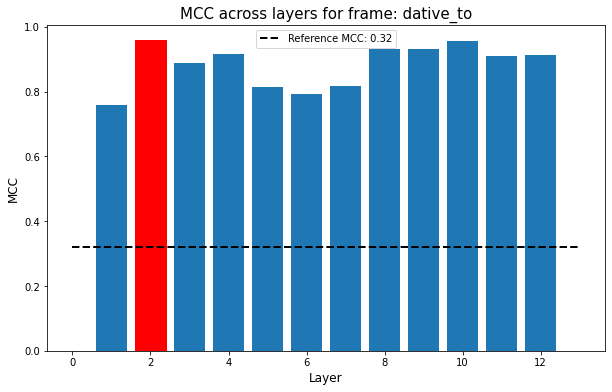

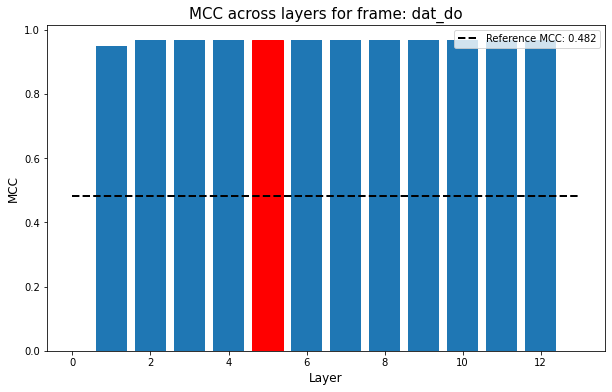

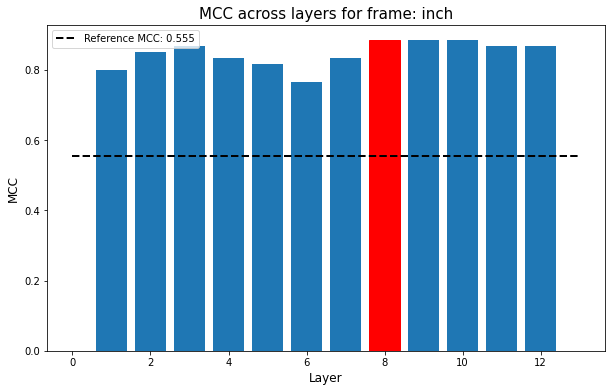

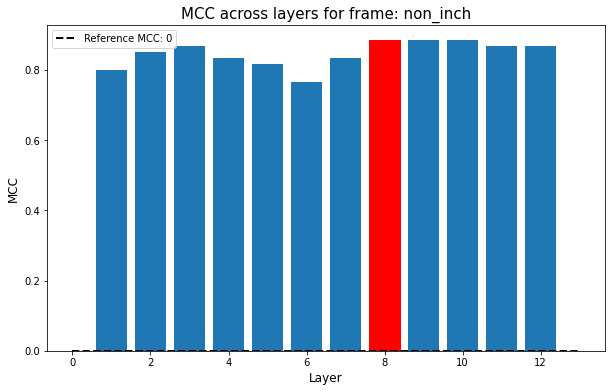

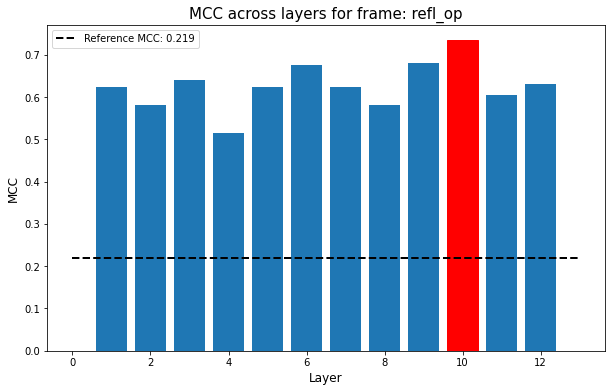

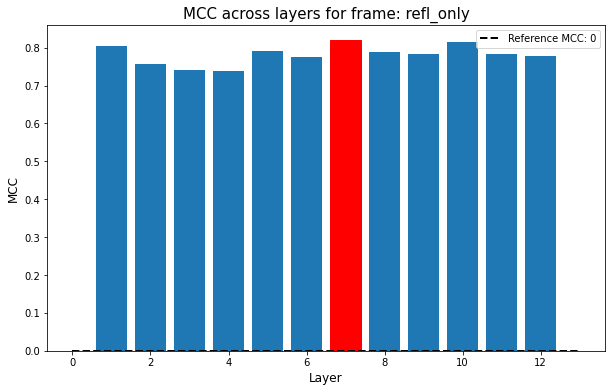

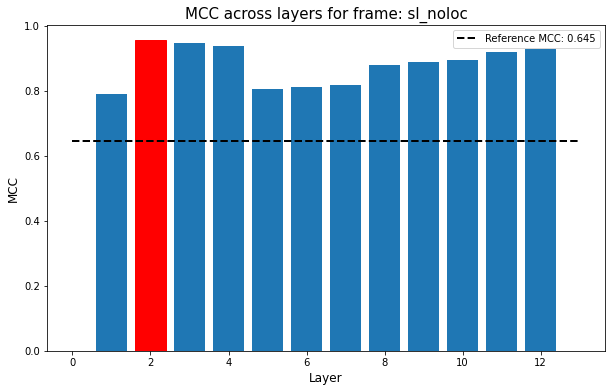

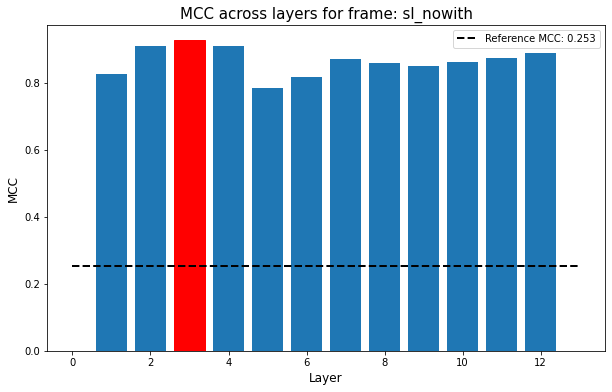

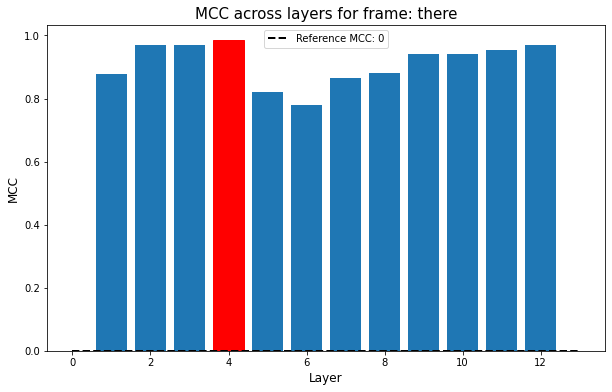

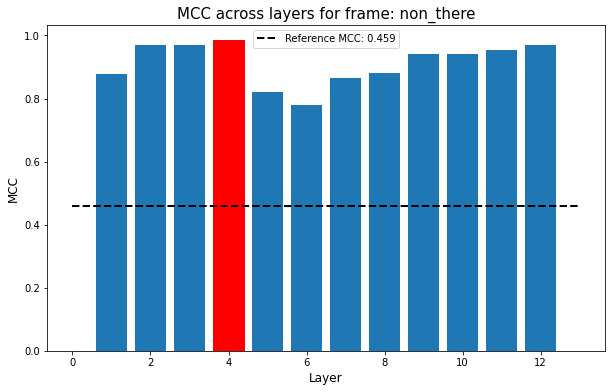

In [179]:
best_layers = []
best_mccs = []
for alternation in all_df['alternation_class'].unique():
    alternation_df = all_df[all_df['alternation_class'] == alternation].reset_index()
    plt.figure(figsize=(10, 6))
    fig = plt.bar(alternation_df.layer, alternation_df.mcc)
    best_layer = alternation_df.mcc.argmax()
    best_layers.append(best_layer)
    best_mcc = alternation_df['mcc'][best_layer]
    best_mccs.append(best_mcc)
    plt.hlines(y=ref[alternation], xmin=0, xmax=13, linestyles='--', lw=2, color='black', label=f'Reference MCC: {ref[alternation]}')
    fig[best_layer].set_color('r')
    plt.title(f'MCC across layers for frame: {alternation}', fontsize=15)
    plt.xlabel('Layer', fontsize=12)
    plt.ylabel('MCC', fontsize=12)
    plt.legend()
    plt.show()

In [184]:
pd.DataFrame(data={'Frame': frames, 'BERT layer': best_layers, 'MCC': best_mccs, 'Reference MCC': ref_mcc})

,Frame,BERT layer,MCC,Reference MCC
0,dative_to,1,0.958468,0.320
1,dat_do,4,0.967252,0.482
2,inch,7,0.883893,0.555
3,non_inch,7,0.883893,0.000
4,refl_op,9,0.734297,0.219
5,refl_only,6,0.819723,0.000
6,sl_noloc,1,0.955865,0.645
7,sl_nowith,2,0.926923,0.253
8,there,3,0.984987,0.000
9,non_there,3,0.984987,0.459
